In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

seed = 17

In [2]:
from scipy.stats import ks_2samp

In [3]:
columns = [f'Column{i}' for i in range(1,57)]

In [4]:
df_train1 = pd.read_csv('train.csv',names=columns)
df_train2 = pd.read_csv('Train_2.csv',names=columns)
df_train = pd.concat([df_train1,df_train2])
del df_train1
del df_train2
df_test = pd.read_csv('test.csv',names=columns[:55])

In [5]:
print(f'Train shape = {df_train.shape}')
print(f'Test shape = {df_test.shape}')

Train shape = (581012, 56)
Test shape = (174303, 55)


In [6]:
# cols_test = ['Column1','Column2','Column3','Column4','Column5','Column6','Column7','Column8','Column9','Column10']#,'Column16','Column20','Column22','Column29','Column30','Column52']

In [7]:
df_train.head()
# y = df_train['Column56']
# df_train = df_train[cols_test]

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56
0,447095,3452,111,22,433,214,3677,252,210,74,...,0,0,0,0,0,0,0,1,0,0.0
1,113427,3093,95,9,124,7,4115,234,227,124,...,0,0,0,0,0,0,0,0,0,1.0
2,66435,2551,61,17,90,5,726,231,202,98,...,0,0,0,0,0,0,0,0,0,1.0
3,8957,2944,135,3,430,13,1868,224,238,149,...,0,0,0,0,0,0,0,0,0,1.0
4,434631,3030,327,34,277,101,1973,120,181,190,...,0,1,0,0,0,0,0,0,0,1.0


In [8]:
df_test.head()
# df_test = df_test[cols_test]

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55
0,258918,2352,293,23,256,45,201,151,228,215,...,0,0,0,0,0,0,0,0,0,0
1,258134,2790,88,8,330,35,1400,232,227,128,...,0,0,0,0,0,0,0,0,0,0
2,165265,2826,115,7,162,24,1020,232,233,134,...,0,0,0,0,0,0,0,0,0,0
3,522141,3234,137,16,150,20,968,243,232,112,...,0,0,0,0,0,0,0,0,0,0
4,569662,2810,58,22,124,25,3293,230,188,80,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y = df_train['Column56']
df_train.drop('Column56',axis=1,inplace=True)

In [10]:
for col in df_train.columns[2:11]:
    print(col)
    for val in np.unique(df_train[col]):
        diff = np.abs(sum(y[df_train[(df_train[col]==val)].index]==1)-sum(y[df_train[(df_train[col]==val)].index]==0))
        if diff > 1000:
            print(f'{val} {sum(y[df_train[(df_train[col]==val)].index]==1)} {sum(y[df_train[(df_train[col]==val)].index]==0)}')

Column3
Column4
9 19444 20535
11 20359 21610
12 20166 21270
13 19480 21155
14 18260 19681
15 17373 19037
16 15929 17205
17 13842 15255
18 12479 13826
19 11166 12661
20 9560 11344
21 8217 9824
22 7598 9410
23 6212 8200
24 5792 7299
25 5023 6321
26 4423 5804
27 3608 4972
28 3055 4545
29 2500 3917
30 2208 3392
31 1788 2936
Column5
0 11833 18679
30 17353 24871
42 7830 10289
60 10342 13327
67 8380 10463
85 7733 9315
90 6146 7681
95 5126 6268
108 8232 9640
120 6116 7179
150 12352 13657
Column6
0 19591 28354
1 3706 4864
2 3914 4959
3 5194 6254
Column7


KeyboardInterrupt: 

In [11]:
# column_to_drop = [f'Column{i}' for i in range(11,56)]

# df_train['Column56'] = df_train.drop(column_to_drop,axis=1).mean(axis=1)
# df_test['Column56'] = df_test.drop(column_to_drop,axis=1).mean(axis=1)

# df_train['Column57'] = df_train.drop(column_to_drop,axis=1).median(axis=1)
# df_test['Column57'] = df_test.drop(column_to_drop,axis=1).median(axis=1)

# df_train['Column58'] = df_train.drop(column_to_drop,axis=1).min(axis=1)
# df_test['Column58'] = df_test.drop(column_to_drop,axis=1).min(axis=1)

# df_train['Column59'] = df_train.drop(column_to_drop,axis=1).max(axis=1)
# df_test['Column59'] = df_test.drop(column_to_drop,axis=1).max(axis=1)

# df_train['Column60'] = df_train.drop(column_to_drop,axis=1).std(axis=1)
# df_test['Column60'] = df_test.drop(column_to_drop,axis=1).std(axis=1)

3858 3856
360 360
66 65
1397 1390
601 597
7117 7117
254 254
254 254
254 254
7173 7173


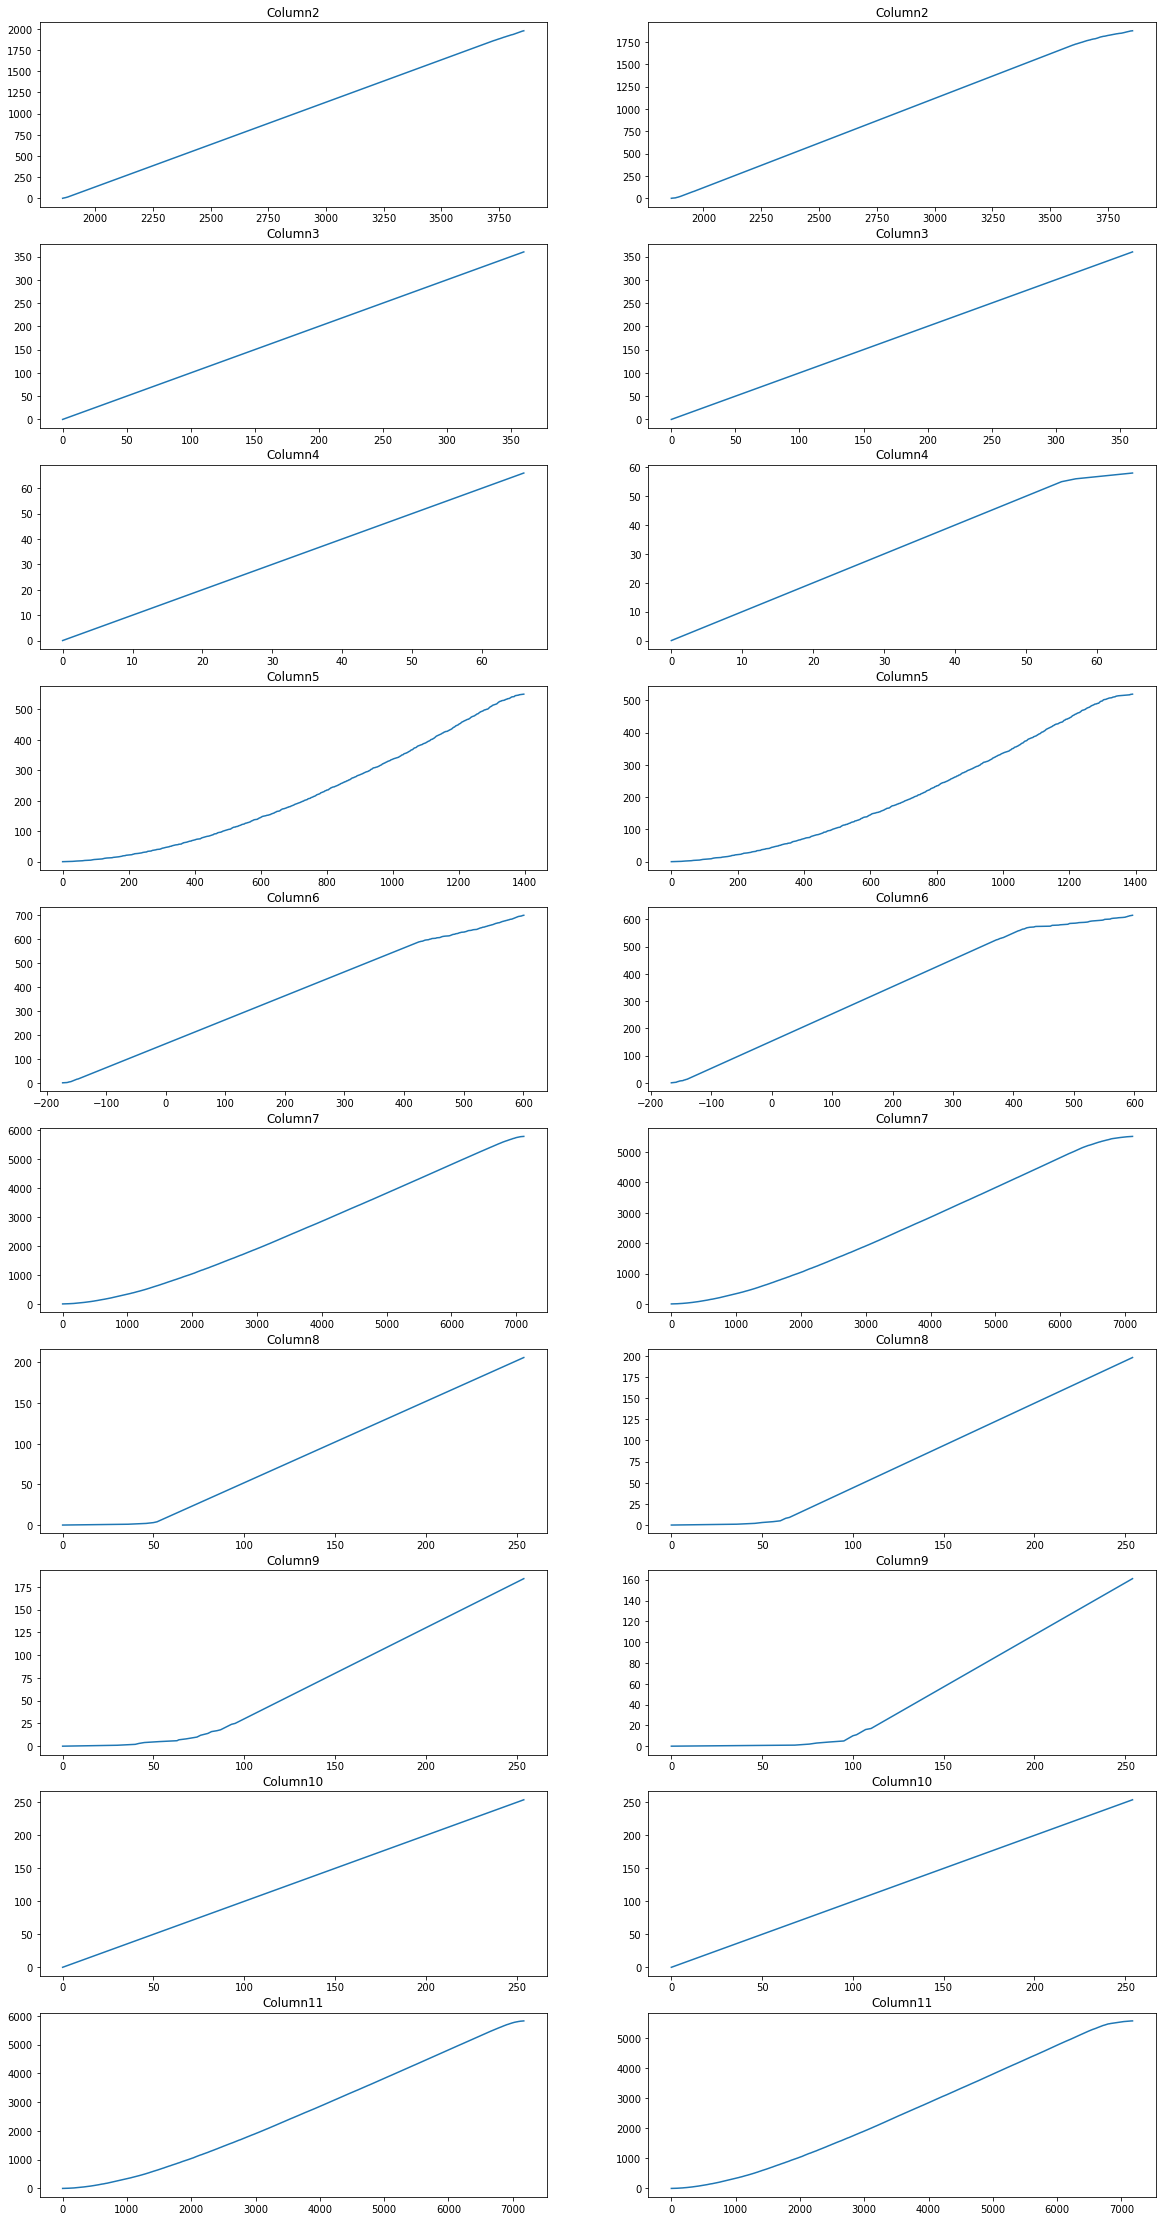

In [12]:
fig,axes = plt.subplots(nrows=10,ncols=2,figsize=(20,40))
for i,col in enumerate(df_train.columns[1:11]):
    n_row = i
    val = np.sort(df_train[col].unique())
    val_2 = np.sort(df_test[col].unique())
    print(f'{np.max(val)} {np.max(val_2)}')
    axes[n_row,0].plot(val,range(len(val)))
    axes[n_row,1].plot(val_2,range(len(val_2)))
    axes[n_row,0].set_title(col)
    axes[n_row,1].set_title(col)
plt.show()

Ks_2sampResult(statistic=0.0012432644127878811, pvalue=0.9856406469270914)
Ks_2sampResult(statistic=0.0017174573995615838, pvalue=0.8235926583556661)
Ks_2sampResult(statistic=0.002439443237648331, pvalue=0.40171083401882446)
Ks_2sampResult(statistic=0.0012626755075284268, pvalue=0.9830476322488404)
Ks_2sampResult(statistic=0.0025202783956058683, pvalue=0.36157098363460055)
Ks_2sampResult(statistic=0.003090707548774607, pvalue=0.15403547150933108)
Ks_2sampResult(statistic=0.0020935523158670533, pvalue=0.5988979982817549)
Ks_2sampResult(statistic=0.0027437237103642986, pvalue=0.26468360438905836)
Ks_2sampResult(statistic=0.0010695182973016193, pvalue=0.9979350361583738)
Ks_2sampResult(statistic=0.002953417670863212, pvalue=0.19236823630551034)


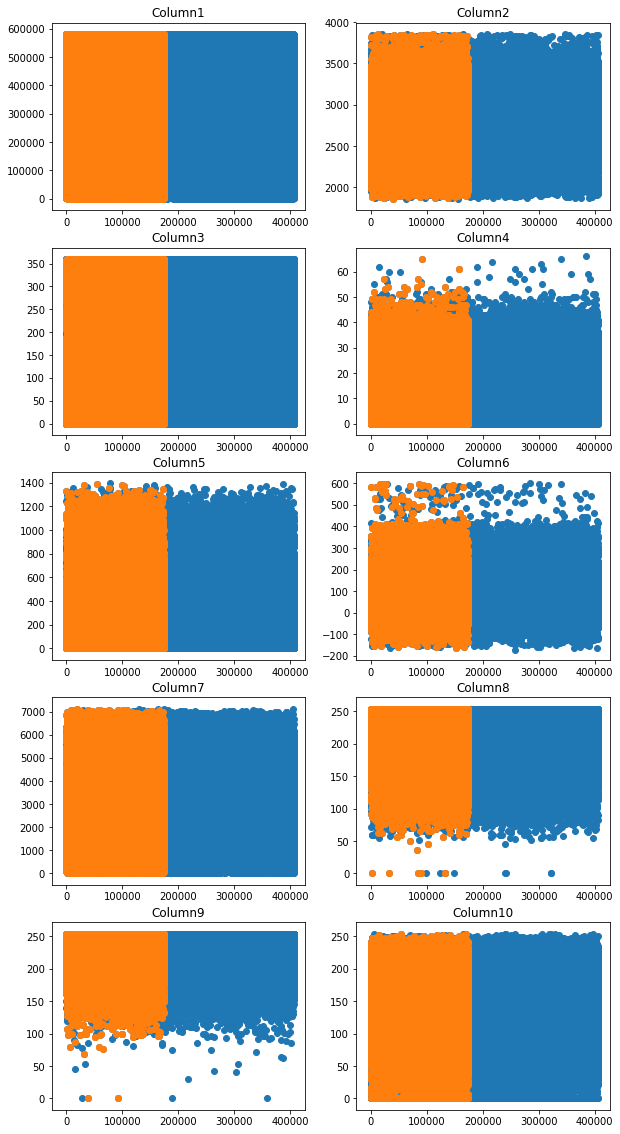

In [13]:
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(10,20))
for i,col in enumerate(df_train.columns):
    nrow = i//2;
    ncol = i%2;
    if i==10:
        break
    axes[nrow,ncol].scatter(df_train[col].index,df_train[col].values)
    axes[nrow,ncol].scatter(df_test[col].index,df_test[col].values)
    axes[nrow,ncol].set_title(col)
    print(ks_2samp(df_train[col],df_test[col]))
plt.show()
# we cannot drop this column as p value > 10%

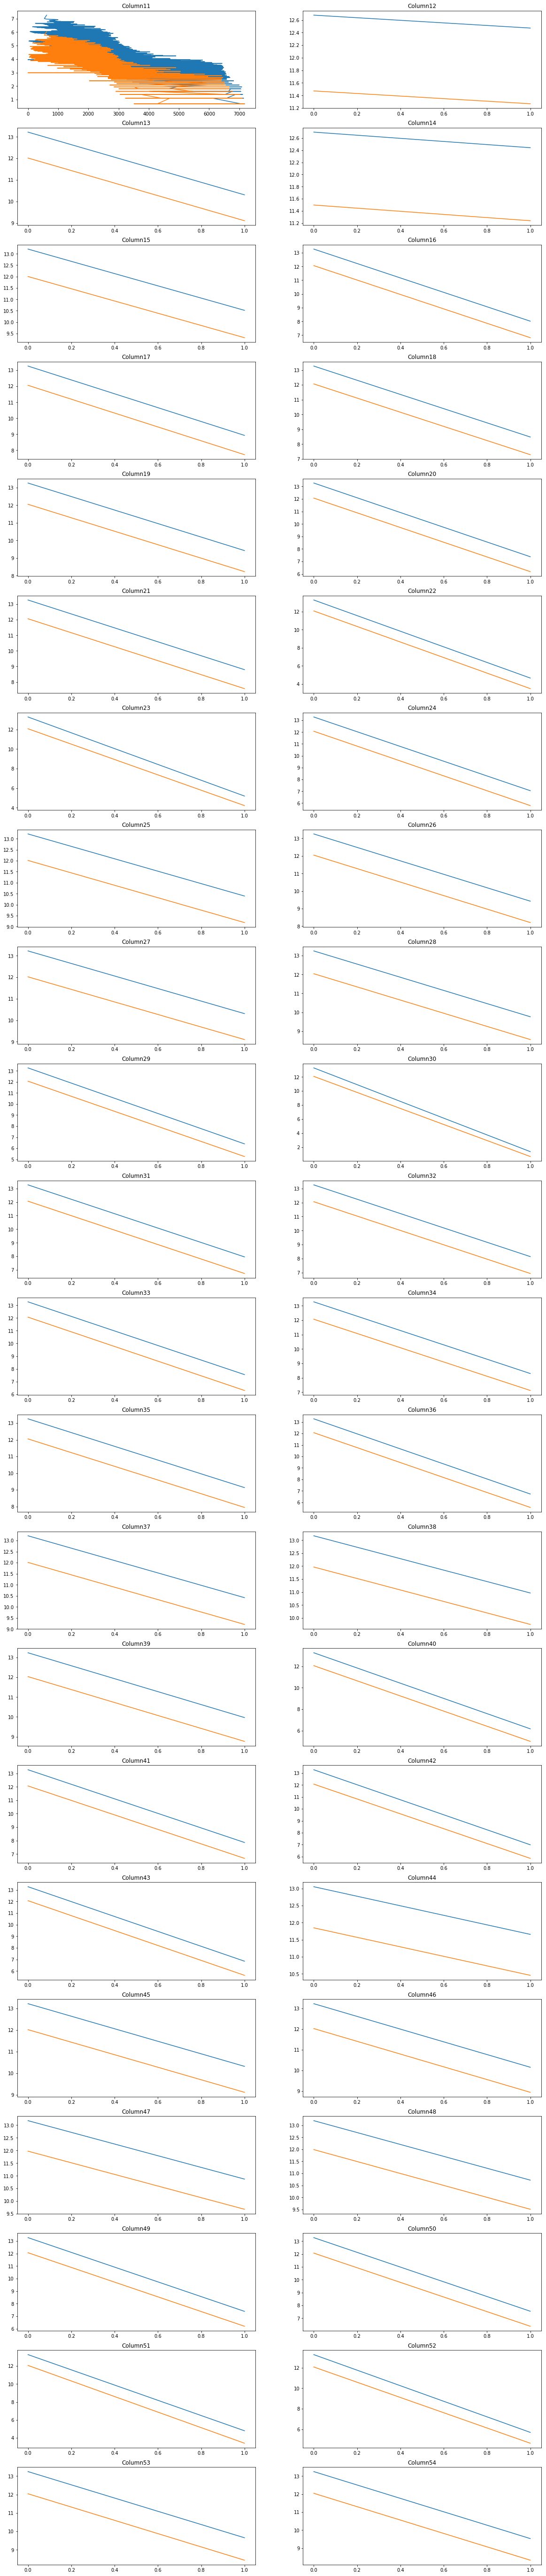

In [14]:
fig,axes = plt.subplots(nrows=22,ncols=2,figsize=(20,100))
for i,col in enumerate(df_train.columns[10:54]):
    nrow = i//2;
    ncol = i%2;
    axes[nrow,ncol].plot(df_train[col].value_counts().index,np.log1p(df_train[col].value_counts().values))
    axes[nrow,ncol].plot(df_test[col].value_counts().index,np.log1p(df_test[col].value_counts().values))
    axes[nrow,ncol].set_title(col)
plt.show()
# we cannot drop this column as p value > 10%

In [15]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [16]:
grid_param = {'n_estimators':[17,19,22],
              'min_samples_split':[6],
              'max_features':[0.7,0.8]}
random_param = {'n_estimators':range(15,20),
              'min_samples_split':range(5,12),
                'max_leaf_nodes':range(15,60),
               'max_features':['sqrt',0.8,0.9]}
# 100-no of estimators, 2-min-samples-split, 0.6-max=features, 2018-random seed  // best random forest params

In [21]:
# kfold = StratifiedKFold(n_splits=10,random_state=2018)
# for train_idx,val_idx in kfold.split(df_train,y):
#     X_train,y_train = df_train.iloc[train_idx],y[train_idx]
#     X_test,y_test = df_train.iloc[val_idx],y[val_idx]
#     print(f'{train_idx} {val_idx}')
#     model_rf = RandomizedSearchCV(RandomForestRegressor(random_state=2018,n_jobs=8),random_param)
# model_rf = GridSearchCV(RandomForestClassifier(n_jobs=8,random_state=2018),grid_param,n_jobs=4,verbose=2)
# model_rf = RandomForestRegressor(criterion='mae',n_estimators=1,max_features=0.5,n_jobs=8,random_state=2018)
# model_rf = RandomForestRegressor(criterion='mae',n_estimators=100,max_features=0.7,n_jobs=8,random_state=42)
model_rf = RandomForestRegressor(n_estimators=100,max_features=0.6,n_jobs=8,random_state=2018)
# model_rf = RandomForestRegressor(n_estimators=100,max_features='log2',n_jobs=8,random_state=100000)
model_rf.fit(df_train,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
           oob_score=False, random_state=2018, verbose=0, warm_start=False)

In [18]:
dtr = DecisionTreeRegressor(max_features=0.7,criterion='friedman_mse',random_state=2018)
dtr.fit(df_train,y)
y_pred = dtr.predict(df_test)
print(np.count_nonzero(np.round(y_pred)))
print(len(y_pred)-np.count_nonzero(np.round(y_pred)))
dict_tp2 = {'key':df_test.Column1,'score':}
pd.DataFrame().from_dict(dict_tp2).to_csv('Output_decision_Tree.csv',index=False)

In [23]:
y_pred = model_rf.predict(df_test)
print(np.count_nonzero(np.round(y_pred)))
print(len(y_pred)-np.count_nonzero(np.round(y_pred)))
dict_data = {'key':df_test.Column1,'score':y_pred}
pd.DataFrame().from_dict(dict_data).to_csv('Output_random_forest.csv',index=False)

85128
89175
